In [57]:
import yfinance as yf
import pandas as pd
from pandas_datareader import data as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [58]:
# GEt the stock symbols/tickers in the portfolio
# FAANG

assets = ['META', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

In [59]:
# Assign weights to the stocks.

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [60]:
# Get the stock/portfolio starting date
stockStartDate = '2013-01-01'

In [61]:
# Get the stocks ending date (today)
today = datetime.today().strftime('%Y-%m-%d')
today

'2024-08-08'

In [69]:
# Create a df to store the adjusted close price of the stocks

df = pd.DataFrame()

for stock in assets:
    df[stock] = yf.download(stock, stockStartDate, today)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [70]:
df

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,27.942581,12.865500,16.725035,13.144286,17.993254
2013-01-03,27.713053,12.924000,16.513929,13.798571,18.003704
2013-01-04,28.701021,12.957500,16.053940,13.711429,18.359463
2013-01-07,29.359669,13.423000,15.959507,14.171429,18.279356
2013-01-08,29.000406,13.319000,16.002459,13.880000,18.243282
...,...,...,...,...,...
2024-08-01,497.739990,184.070007,218.360001,624.849976,172.449997
2024-08-02,488.140015,167.899994,219.860001,613.640015,168.399994
2024-08-05,475.730011,161.020004,209.270004,598.549988,160.639999


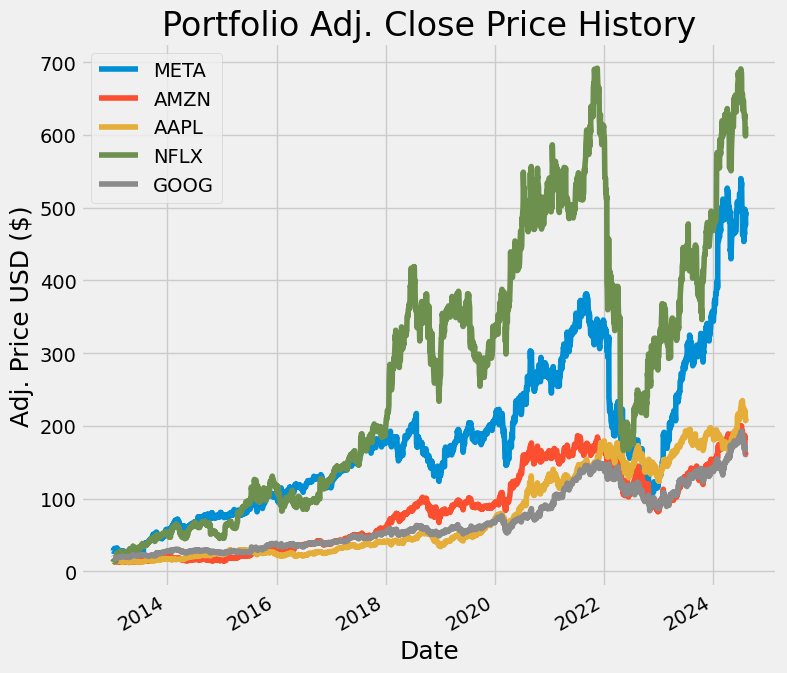

In [71]:
fig, ax = plt.subplots(figsize=(8,8))

title = 'Portfolio Adj. Close Price History'

my_stocks = df

for c in my_stocks.columns.values:
    ax.plot(my_stocks[c], label=c)

ax.set_title(title, fontsize=24)
ax.set_xlabel('Date', fontsize=18)
fig.autofmt_xdate()
ax.set_ylabel('Adj. Price USD ($)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.grid(True)
plt.show()

In [72]:
returns = df.pct_change()
returns

,META,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001973
...,...,...,...,...,...
2024-08-01,0.048249,-0.015563,-0.016751,-0.005570,-0.004043
2024-08-02,-0.019287,-0.087847,0.006869,-0.017940,-0.023485
2024-08-05,-0.025423,-0.040977,-0.048167,-0.024591,-0.046081


In [73]:
# Create and show th annaulized covariance matrix

cov_matrix_annual = returns.cov() * 252

cov_matrix_annual

,META,AMZN,AAPL,NFLX,GOOG
META,0.148415,0.068465,0.050490,0.071021,0.061547
AMZN,0.068465,0.105067,0.044998,0.070103,0.055517
AAPL,0.050490,0.044998,0.079651,0.041574,0.043056
NFLX,0.071021,0.070103,0.041574,0.213474,0.053078
GOOG,0.061547,0.055517,0.043056,0.053078,0.075545


In [74]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))

port_variance

0.0696741255895589

In [75]:
# Calculate the portfolio volatility aka std

port_volatility = np.sqrt(port_variance)
port_volatility

0.2639585679411807

In [76]:
# Calculate the annual portfolio return

portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3032101452697623

In [95]:
# Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility/risk: ' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual return: 30.0%
Annual volatility/risk: 26.0%
Annual variance: 7.000000000000001%


In [78]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [92]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for maximum Sharpe ratio
ef = EfficientFrontier(mu, S)

weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()

print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('META', 0.11659), ('AMZN', 0.07788), ('AAPL', 0.45622), ('NFLX', 0.30667), ('GOOG', 0.04264)])
Expected annual return: 29.3%
Annual volatility: 27.1%
Sharpe Ratio: 1.01


(0.29261533944846396, 0.27085660119591254, 1.0064932449302917)

In [93]:
# Get the discrete allocation of each share per stock

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 15000)

In [94]:
allocation, leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Fund remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'META': 4, 'AMZN': 7, 'AAPL': 33, 'NFLX': 7, 'GOOG': 4}
Fund remaining: $57.51
